In [1]:
# Install required libraries (only first time)
!pip install transformers datasets torch matplotlib


In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModelForSequenceClassification, pipeline
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Load GPT-2 model + tokenizer
gpt_tokenizer = AutoTokenizer.from_pretrained("gpt2")
gpt_model = AutoModelForCausalLM.from_pretrained("gpt2")

generator = pipeline("text-generation", model=gpt_model, tokenizer=gpt_tokenizer)

# Test with multiple prompts
prompts = [
    "Explain overfitting in simple words:",
    "AI will change the world because",
    "Medical devices are important because"
]

gpt_outputs = []
for p in prompts:
    out = generator(p, max_length=50, num_return_sequences=1)
    gpt_outputs.append({"Prompt": p, "Generated": out[0]['generated_text']})

pd.DataFrame(gpt_outputs)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/m

,Prompt,Generated
0,Explain overfitting in simple words:,Explain overfitting in simple words:\n\nA good...
1,AI will change the world because,AI will change the world because we don't want...
2,Medical devices are important because,Medical devices are important because they are...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Prompt').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Generated').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Generated'].value_counts()
    for x_label, grp in _df_2.groupby('Prompt')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Prompt')
_ = plt.ylabel('Generated')

In [4]:
# Load a pretrained DistilBERT sentiment model
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Test sentences
texts = [
    "I love working on AI projects!",
    "This exam is so stressful and frustrating.",
    "The movie was not bad at all.",
    "Medical devices save millions of lives."
]

bert_results = classifier(texts)

# Put results into a DataFrame
bert_df = pd.DataFrame([{"Text": t, "Label": r['label'], "Score": round(r['score'], 3)} for t, r in zip(texts, bert_results)])
bert_df


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


,Text,Label,Score
0,I love working on AI projects!,POSITIVE,0.999
1,This exam is so stressful and frustrating.,NEGATIVE,0.998
2,The movie was not bad at all.,POSITIVE,0.998
3,Medical devices save millions of lives.,POSITIVE,0.921


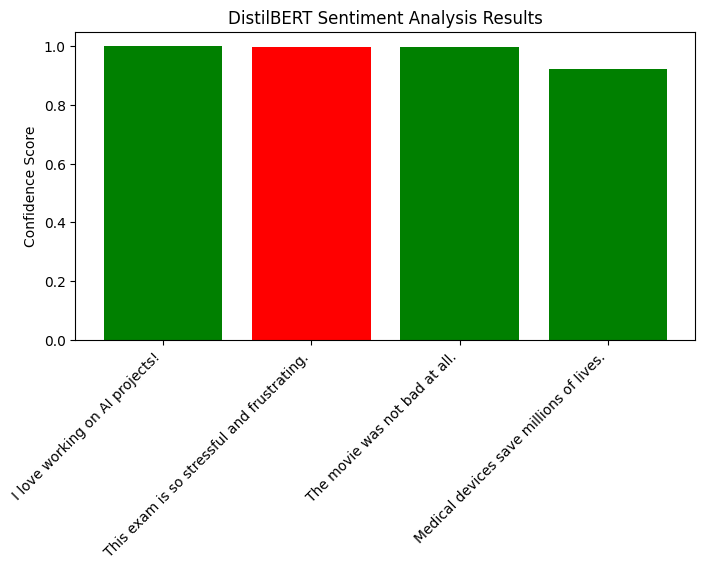

In [5]:
#visualization
# Bar chart of sentiment scores
plt.figure(figsize=(8,4))
plt.bar(bert_df["Text"], bert_df["Score"], color=["green" if l=="POSITIVE" else "red" for l in bert_df["Label"]])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Confidence Score")
plt.title("DistilBERT Sentiment Analysis Results")
plt.show()


## Research Questions

1. **Context understanding:**
   - When does BERT misclassify? (e.g., tricky sentences like "not bad" may confuse it)
   - GPT-2 may drift off-topic with longer generations.

2. **Creativity vs control:**
   - How does GPT-2 behave if you change `max_length` or `temperature`?
   - Does it get more random or more repetitive?

3. **Adaptability:**
   - What happens if prompts are domain-specific (like medical devices)?
   - Would fine-tuning on domain data improve results?

4. **Ethics:**
   - GPT-2 might generate biased or unsafe text.
   - BERT may reflect dataset bias.
   - How can these be mitigated? (filtering, finetuning, RLHF).